In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras import datasets,layers,models

In [4]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [5]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

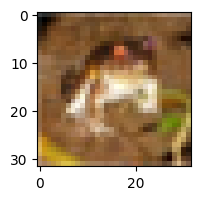

In [14]:
plt.figure(figsize=(6,2))
plt.imshow(x_train[0])

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train=y_train.reshape(-1,)

In [18]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [20]:
y_test=y_test.reshape(-1,)

In [21]:
#normalizing the images: dividing by 255 so that all the datapoints falls under 0 to 1

In [22]:
x_train=x_train/255
x_test=x_test/255

In [29]:
cnn = models.Sequential([
        #convolution layers :you can randomly add this by hit and trial 
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        # dense neural network
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [24]:
#uisng sigmoid we may get values like 0.45,0.81 as output but when we use softmax our output will be 
#1:0.45/(0.45+0.82)
#2:0.82/(0.45+0.82)
#and when we total it we always get 1 #this is just an example 

In [30]:
cnn.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 50s 23ms/step - loss: 1.4930 - accuracy: 0.4667
Epoch 2/5
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1598 - accuracy: 0.5935
Epoch 3/5
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0349 - accuracy: 0.6391
Epoch 4/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9475 - accuracy: 0.6704
Epoch 5/5
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8908 - accuracy: 0.6892


In [31]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9432 - accuracy: 0.6763


[0.9432123899459839, 0.6762999892234802]

In [32]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[3.5417601e-03, 1.5791367e-05, 3.7000538e-03, 6.1408085e-01,
        6.3912728e-04, 2.5023633e-01, 4.6259750e-02, 9.2855812e-04,
        8.0371968e-02, 2.2579386e-04],
       [1.2420170e-01, 2.9371876e-01, 1.0980016e-05, 9.8302089e-06,
        2.8694840e-06, 2.8151305e-07, 1.4563640e-06, 2.5979125e-07,
        5.7714885e-01, 4.9050399e-03],
       [8.3872221e-02, 7.9169415e-02, 1.5573638e-03, 4.9796137e-03,
        8.1486878e-04, 6.5570371e-04, 1.0357163e-03, 7.1264838e-04,
        8.1080884e-01, 1.6393580e-02],
       [4.7337636e-01, 9.2332602e-02, 4.2399235e-02, 3.7986359e-03,
        4.6822936e-03, 4.4890193e-04, 8.3322302e-03, 2.4740954e-03,
        3.5764250e-01, 1.4513174e-02],
       [5.5132964e-06, 8.4510002e-06, 4.5657540e-03, 7.0995940e-03,
        6.6698718e-01, 1.5145172e-03, 3.1960002e-01, 1.9287896e-04,
        2.1277587e-05, 4.7648532e-06]], dtype=float32)

In [33]:
y_classes=[np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [34]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [35]:
#we can see that model was incorrecty only once 

In [37]:
classes[y_classes[3]]

'airplane'

In [38]:
classes[y_test[3]]

'airplane'

In [39]:
classes[y_classes[5]]

'deer'

In [42]:
classes[y_classes[5]]# incorrect prediction

'frog'

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print("classification_report:\n",classification_report(y_test,y_classes))

classification_report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.80      0.78      0.79      1000
           2       0.64      0.44      0.52      1000
           3       0.50      0.45      0.47      1000
           4       0.61      0.63      0.62      1000
           5       0.61      0.58      0.59      1000
           6       0.60      0.87      0.71      1000
           7       0.72      0.77      0.75      1000
           8       0.77      0.80      0.79      1000
           9       0.78      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



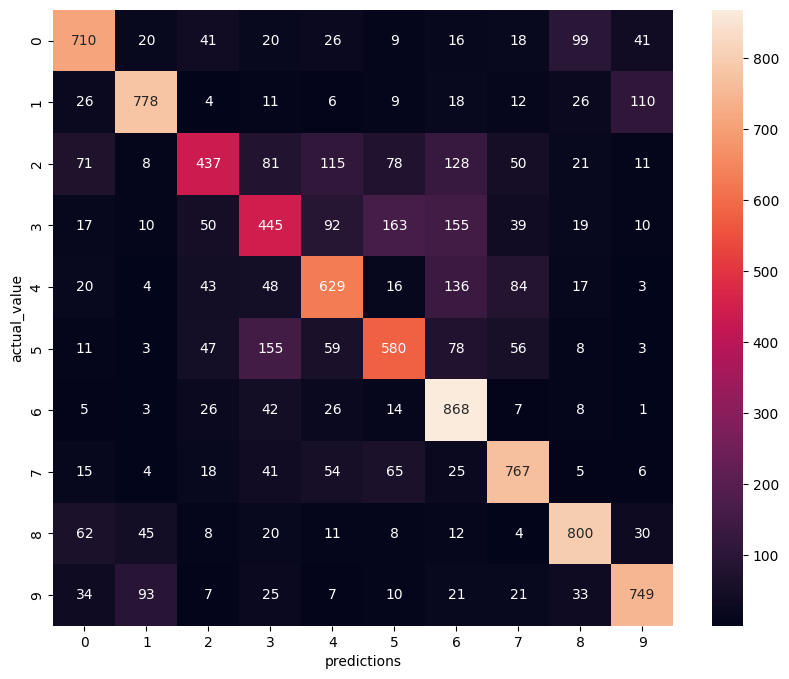

In [45]:
import seaborn as sns 
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predictions")
plt.ylabel("actual_value")
plt.show()

In [46]:
#project completed :)